<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/EunjuKang/project_04/230118_commit_2_Project04_%EB%91%90%ED%94%BC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%8B%9C%EC%8A%A4%ED%85%9C_2nd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project04.두피 데이터 분석 시스템

주어진 데이터가 어떻게 구성되어 있고 어느 부분을 어떻게 활용할지 생각해봐야함 


1. Validation set: 원천데이터와 라벨링데이터

  미세각질 피지과다 모낭사이홍반 모낭홍반농포 비듬 탈모 6종류가 0-3로 분류되어 있음

2. Meta data: 각 사람에 대한 정보

데이터 구조 정리

Meta Data 디렉토리 안에는 

  0013_A2LEBJJDE00060O_1602578303771_2_TH_META.json -> 5개

  0013_A2LEBJJDE00060O_1602578303771_3_TH

  0013_A2LEBJJDE00060O_1602578303771_4_LH

  0013_A2LEBJJDE00060O_1602578303771_5_RH

  0013_A2LEBJJDE00060O_1602578303771_6_BH

위와 같이 한 사람에 대해 json 파일이 다섯개 있으며 

'0013_A2LEBJJDE00060O_1602578303771_' 가 사람마다의 고유한 값, 
위를 기준으로 디렉토리를 새로 정리하기로 계획함





한 증상에 대해 양호인 경우는 다른 증상들에 대해서도 양호를 보이는 경우가 많음 -> 이를 그래프로 시각화하여 서로 연관성을 확인해보고자 함

펌, 염색 여부에 따른 증상 분포 시각화

각 증상에 대한 중증도 0~3을 모두 분류하기보단 0(양호): 없음 / 1-3(경증, 중등도,중증) : 있음으로 분류 -> sigmoid 함수를 통해 나오는 확률값으로 결과를 예측하고자 함 
ex. 0.78, 0.22 -> 탈모가 있을 확률이 22% 입니다. 

모델링 목표: 새로운 사진이 입력되면 증상별로 위험도를 예측하고 사람이 성별 및 나이, 추천을 원하는지 여부를 파악하여 제품 추천

- 추가 검색이 필요한 정보들 

  남성/여성별 발병률이 높은 증상

  연령대에 따른 증상의 발병률

  펌, 염색 여부에 따른 분류 (펌, 염색은 모발 손상에 큰 영향)

  각 증상 완화에 도움이 되는 제품 조사


데이터의 용량을 고려하여 압축률을 최대로 하여 업로드, zip을 풀지 않고는 파일 접근 불가능?

01/17 목표: 모델 생성 완료 및 데이터 업로드 +
1차 모델로 학습시키기 (early stopping + augmentation)

## 1. 데이터 확인 및 분석

### 데이터 불러오기

#### 원천 데이터

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


glob 로 파일명 리스트로 받아오려고 했는데 .zip 형식 파일 경로는 !unzip 명령어에서 에러 발생 -> 직접 코드로 풀기

In [ ]:
"""
!mkdir /content/scalp_data/img_zip_dir # zip 파일 저장할 디렉토리

%cd /content/scalp_data/img_zip_dir 
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_1_img.Zip'

%cd /content/scalp_data/img_data # 이미지 저장할 디렉토리
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]미세각질_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]미세각질_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]미세각질_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]미세각질_3.중증.zip'

%cd /content/scalp_data/img_zip_dir
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_2_img.Zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]피지과다_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]피지과다_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]피지과다_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]피지과다_3.중증.zip'

%cd /content/scalp_data/img_zip_dir
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_3_img.Zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭사이홍반_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭사이홍반_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭사이홍반_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭사이홍반_3.중증.zip'

%cd /content/scalp_data/img_zip_dir
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_4_img.Zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_3.중증.zip'


%cd /content/scalp_data/img_zip_dir
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_5_img.Zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]비듬_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]비듬_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]비듬_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]비듬_3.중증.zip'

%cd /content/scalp_data/img_zip_dir
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_6_img.Zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]탈모_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]탈모_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]탈모_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]탈모_3.중증.zip'
"""

In [ ]:
!mkdir /content/scalp_data

In [ ]:
!mkdir /content/scalp_data/img_zip_dir # zip 파일 저장할 디렉토리

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [ ]:
!mkdir /content/scalp_data/img_data # 이미지 파일 저장할 디렉토리

In [ ]:
%cd /content/scalp_data/img_zip_dir 

!unzip -qq '/content/drive/MyDrive/04_Scalp/value_4_img.Zip'
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_5_img.Zip'
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_6_img.Zip'

/content/scalp_data/img_zip_dir
[원천]모낭홍반농포_0.양호.zip:  mismatching "local" filename ([ьЫРь▓Ь]ыкиыВнэЩНы░ШыЖНэПм_0.ьЦСэШ╕.zip),
         continuing with "central" filename version
[원천]모낭홍반농포_1.경증.zip:  mismatching "local" filename ([ьЫРь▓Ь]ыкиыВнэЩНы░ШыЖНэПм_1.ъ▓╜ьжЭ.zip),
         continuing with "central" filename version
[원천]모낭홍반농포_2.중등도.zip:  mismatching "local" filename ([ьЫРь▓Ь]ыкиыВнэЩНы░ШыЖНэПм_2.ьдСыУ▒ыПД.zip),
         continuing with "central" filename version
[원천]모낭홍반농포_3.중증.zip:  mismatching "local" filename ([ьЫРь▓Ь]ыкиыВнэЩНы░ШыЖНэПм_3.ьдСьжЭ.zip),
         continuing with "central" filename version
[원천]비듬_0.양호.zip:  mismatching "local" filename ([ьЫРь▓Ь]ы╣ДыУм_0.ьЦСэШ╕.zip),
         continuing with "central" filename version
[원천]비듬_1.경증.zip:  mismatching "local" filename ([ьЫРь▓Ь]ы╣ДыУм_1.ъ▓╜ьжЭ.zip),
         continuing with "central" filename version
[원천]비듬_2.중등도.zip:  mismatching "local" filename ([ьЫРь▓Ь]ы╣ДыУм_2.ьдСыУ▒ыПД.zip),
         continuing with "central" fil

In [ ]:
"""
import os
import shutil

dir_path = '/content/scalp_data/img_zip_dir'

if os.path.exists(dir_path):
    shutil.rmtree(dir_path)
"""

In [ ]:
import glob 
import zipfile 

img_path = '/content/scalp_data/img_zip_dir'
img_path_list = glob.glob(img_path+'/*')


In [ ]:
print(img_path_list[:10])

['/content/scalp_data/img_zip_dir/[원천]비듬_1.경증.zip', '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_0.양호.zip', '/content/scalp_data/img_zip_dir/[원천]탈모_2.중등도.zip', '/content/scalp_data/img_zip_dir/[원천]탈모_3.중증.zip', '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_2.중등도.zip', '/content/scalp_data/img_zip_dir/[원천]탈모_0.양호.zip', '/content/scalp_data/img_zip_dir/[원천]비듬_2.중등도.zip', '/content/scalp_data/img_zip_dir/[원천]비듬_3.중증.zip', '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_1.경증.zip', '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_3.중증.zip']


In [ ]:
for img_path in img_path_list:
  img_zip =  zipfile.ZipFile(img_path)
  img_zip.extractall('/content/scalp_data/img_data')
  img_zip.close()

In [ ]:
# 총 23568 개의 이미지

import os

file_list = os.listdir('/content/scalp_data/img_data')
print(len(file_list))

23568


In [ ]:
file_list.sort()

#### 라벨링 데이터

파이썬 zipfile 모듈 이용하면 훨씬 간단하게 불러올 수 있음

In [ ]:
!mkdir /content/scalp_data/label_data

In [ ]:
import glob 
import zipfile 

path = '/content/drive/MyDrive/04_Scalp/label_zip'
path_list = glob.glob(path+'/*')

print(path_list)

['/content/drive/MyDrive/04_Scalp/label_zip/[라벨]미세각질_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭홍반농포_0.양호.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]미세각질_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]미세각질_1.경증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭홍반농포_1.경증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]미세각질_0.양호.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭홍반농포_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭홍반농포_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_1.경증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_0.양호.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_z

In [ ]:
for json_path in path_list:
  json_zip = zipfile.ZipFile(json_path)
  json_zip.extractall('/content/scalp_data/label_data')
  json_zip.close()

In [ ]:
# json 파일 총 23568개 : 이미지랑 개수 동일

json_list = os.listdir('/content/scalp_data/label_data')
print(len(json_list))

23568


In [ ]:
json_list.sort()

#### 원천 vs 라벨링 데이터 비교

23568/6= 3928 -> 고유한 개인이 총 3928명인지 확인하기

In [ ]:
# 이미지 파일 : file_list
# 라벨링 파일 : json_list

print(file_list[0][:-8])
print(json_list[0][:-9])

2278_A2LEBJJDE00181Z_1606655779534_
8297_A2LEBJJDE001076_1607596628119_


In [ ]:
# 이미지 이름에서 얻는 개인의 id 목록

id_list = []

def get_person_id_from_img_name (file_name):
  id = file_name[:-8]
  id_list.append(id)

In [ ]:
for img_name in file_list:
  get_person_id_from_img_name(img_name)

print(len(id_list))

23568


In [ ]:
id_set_list = list(set(id_list))

print(len(id_set_list)) # 고유 id 값이 6580개

6580


In [ ]:
id_set_list.sort()

In [ ]:
# 라벨링 이름에서 얻는 개인의 id 목록

json_id_list = []

def get_person_id_from_json_name (file_name):
  id = file_name[:-9]
  json_id_list.append(id)

In [ ]:
for json_name in json_list:
  get_person_id_from_json_name(json_name)

In [ ]:
print(len(json_id_list))

23568


In [ ]:
json_id_set_list = list(set(json_id_list))
json_id_list.sort()

In [ ]:
print(len(json_id_set_list))

6580


확인결과 총 3928명이 아닌 6580명 이었음


In [ ]:
# id_set_list vs json_id_set_list 비교

for name in id_set_list:
  if name in json_id_set_list:
    pass
  else:
    print(name)

확인결과 서로 다른 사람이 있지는 않음 -> 모든 사람이 5개의 파일을 가지고 있지는 않음 (validation 데이터만 사용해서 그런듯 함)

In [ ]:
file_list[:10]

['0013_A2LEBJJDE00060O_1605839548962_2_TH.jpg',
 '0013_A2LEBJJDE00060O_1605943763600_3_TH.jpg',
 '0013_A2LEBJJDE00060O_1605943787774_2_TH.jpg',
 '0013_A2LEBJJDE00060O_1605943787774_6_BH.jpg',
 '0013_A2LEBJJDE00060O_1605949144786_2_TH.jpg',
 '0013_A2LEBJJDE00060O_1605949144786_6_BH.jpg',
 '0013_A2LEBJJDE00060O_1605949385518_2_TH.jpg',
 '0013_A2LEBJJDE00060O_1605949385518_6_BH.jpg',
 '0013_A2LEBJJDE00060O_1606386139601_2_TH.jpg',
 '0013_A2LEBJJDE00060O_1606386139601_3_TH.jpg']

In [ ]:
json_list[:10]

['0013_A2LEBJJDE00060O_1605839548962_2_TH.json',
 '0013_A2LEBJJDE00060O_1605943763600_3_TH.json',
 '0013_A2LEBJJDE00060O_1605943787774_2_TH.json',
 '0013_A2LEBJJDE00060O_1605943787774_6_BH.json',
 '0013_A2LEBJJDE00060O_1605949144786_2_TH.json',
 '0013_A2LEBJJDE00060O_1605949144786_6_BH.json',
 '0013_A2LEBJJDE00060O_1605949385518_2_TH.json',
 '0013_A2LEBJJDE00060O_1605949385518_6_BH.json',
 '0013_A2LEBJJDE00060O_1606386139601_2_TH.json',
 '0013_A2LEBJJDE00060O_1606386139601_3_TH.json']

## 2. 데이터 전처리

모델링 목표: 이미지를 입력하면 예측해서 여섯가지 증상에 대해 각자의 여부를 출력하는 모델

output layer는 dense: 6, activation func: sigmoid 를 사용 -> [0.01, 0.78, 0.98, 0.89, 0.02, 0.22] 

-> 미세각질 없음, 피지과다 78%, 모낭사이홍반 98%, 모낭홍반/농포 89%, 비듬 2%, 탈모 22%


이 데이터와 Meta 데이터 + 추가로 상품조사를 따로 하면 제품 추천까지 할 수 있음

각 이미지의 RGB 값: x_train

json 에서 해당 증상에 대한 : y_train

이미지 이름을 전달하면 해당 라벨링 파일을 불러오도록 함

In [ ]:
# 이미지 이름: file_list
# json 이름: json_list

In [ ]:
# .jpg -> .json 으로 변환하는 함수

def img_name_to_json_name(img_name):
  file_name = img_name[:-4]
  file_name = file_name + '.json'
  return (file_name)

In [ ]:
# .json data를 전달하면 각 증상별 유뮤를 리스트로 반환하는 함수 ex. [0,0,0,0,0,0]

# 증상이 0이면 0, 1~3이면 1

def binary_div(value):
  if int(value) == 0:
    return 0
  else:
    return 1

# [0,1,0,0,1,0] 같은 6차원 리스트 반환

def value_list_from_json(json_data):
  value_list = []
  value_list.append(binary_div(json_data['value_1']))
  value_list.append(binary_div(json_data['value_2']))
  value_list.append(binary_div(json_data['value_3']))
  value_list.append(binary_div(json_data['value_4']))
  value_list.append(binary_div(json_data['value_5']))
  value_list.append(binary_div(json_data['value_6']))
  return value_list

In [ ]:
# 확인

json_path = '/content/scalp_data/label_data/0013_A2LEBJJDE00060O_1605839548962_2_TH.json'

import json

with open(json_path, 'r') as file:
    data = json.load(file)

print(value_list_from_json(data))

<class 'dict'>
0
<class 'str'>


In [ ]:
print(value_list_from_json(data))

[0, 1, 0, 1, 0, 1]


#### dataset 형성

In [ ]:
# dataset 만들기

import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import json

x_data = []
y_data = []

img_dir_path = '/content/scalp_data/img_data'
# img_path: img_dir_path + '/' + img_name
# /content/scalp_data/img_data/0013_A2LEBJJDE00060O_1605839548962_2_TH.jpg

json_dir_path = '/content/scalp_data/label_data'
# json_path : json_dir_path + '/' + img_name_to_json_name(img_name)
# /content/scalp_data/label_data/0013_A2LEBJJDE00060O_1605839548962_2_TH.json

for img_name in file_list:
  img_path = img_dir_path + '/' + img_name
  img = PIL.Image.open(img_path)
  #plt.imshow(img)
  #plt.show()
  img = img.convert('RGB')
  img = img.resize((224,224))
  np_img = np.array(img)
  x_data.append(np_img)

  # json에서 증상별 리스트 가져오기
  label_list = []
  json_path = json_dir_path + '/' + img_name_to_json_name(img_name)
  with open(json_path, 'r') as file:
    data = json.load(file)
    label_list = value_list_from_json(data)
    label_list = np.array(label_list)
    y_data.append(label_list)

In [ ]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [ ]:
print(len(x_data))

23568


In [ ]:
x_data.shape

(23568, 224, 224, 3)

In [ ]:
print(len(y_data))

23568


In [ ]:
y_data.shape

(23568, 6)

Data augmentation: 이미 데이터가 너무 많아서 augmentation은 하지 않기로 함

In [ ]:
"""
# dataset을 텍스트파일로 저장해보기

import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import json

x_data = []
y_data = []

img_path = '/content/drive/MyDrive/04_Scalp/6995_A2LEBJJDE00104R_1606040549648_5_RH.jpg'
img = PIL.Image.open(img_path)
#plt.imshow(img)
#plt.show()
img = img.convert('RGB')
img = img.resize((75,75))
np_img = np.array(img)
np_img = np_img / 255.0
x_data.append(np_img)

# json에서 증상별 리스트 가져오기
label_list = []
json_path = '/content/drive/MyDrive/04_Scalp/6995_A2LEBJJDE00104R_1606040549648_5_RH.json'
with open(json_path, 'r') as file:
  data = json.load(file)
  label_list = value_list_from_json(data)
  label_list = np.array(label_list)
  y_data.append(label_list)

x_data = np.array(x_data)
y_data = np.array(y_data)
"""

In [ ]:
np.save('/content/drive/MyDrive/04_Scalp/data_to_numpy/x_data.npy', x_data)

In [ ]:
np.save('/content/drive/MyDrive/04_Scalp/data_to_numpy/y_data.npy', y_data)

#### 매 런타임마다 여기서부터 실행하면 됨

In [ ]:
import numpy as np

x_data = np.load('/content/drive/MyDrive/04_Scalp/data_to_numpy_224/x_data.npy')
y_data = np.load('/content/drive/MyDrive/04_Scalp/data_to_numpy_224/y_data.npy')

In [ ]:
x_data = x_data[:15000]
y_data = y_data[:15000]

In [ ]:
x_data.shape

(15000, 224, 224, 3)

In [ ]:
y_data.shape

(15000, 6)

In [ ]:
"""
# train/val/te 나누기

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.4)

x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)
"""

## 3. 학습 및 성능 확인 

### Model1. Mnist 모델 이용

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def create_cnn_model ():
  model = tf.keras.models.Sequential() # 객체 생성 
  model.add(tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu', input_shape = (75, 75, 3))) # 필터 개수 = 64개, 필터 크기 = 3*3
  model.add(tf.keras.layers.MaxPooling2D((2,2), strides = 1, padding = 'same'))
  # output_shape = (28,28,64)
  model.add(tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu')) # 필터 개수 = 64개, 필터 크기 = 3*3
  model.add(tf.keras.layers.MaxPooling2D((2,2), strides = 1, padding = 'same'))
  # output_shape = (28,28,64)
  model.add(tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu')) # 필터 개수 = 64개, 필터 크기 = 3*3
  model.add(tf.keras.layers.MaxPooling2D((2,2), strides = 1, padding = 'same'))
  # output_shape = (28,28,1)
  model.add(tf.keras.layers.Flatten()) #flatten : 28 * 28 2차원 데이터를 일렬로 나열하는 것
  model.add(tf.keras.layers.Dense(64, activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.2)) # droupout: 너무 특정 feature에만 집중하지 않도록 설정한 부분의 weight 값을 잠시 무시하는 것
  model.add(tf.keras.layers.Dense(6, activation = 'sigmoid')) 
  return model


KeyboardInterrupt: ignored

In [ ]:
cnn_model = create_cnn_model()

In [ ]:
from sklearn.metrics import mean_absolute_error

cnn_model.compile(optimizer='adam', loss = 'mse', metrics = ['accuracy'])
history = cnn_model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 30, batch_size = 30)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

metric 변경하기 + 8:2 로만 나누기

In [ ]:
# train/test 8:2 나누기

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

x_val = x_test[:2]
x_test = x_test[2:]

y_val = y_test[:2]
y_test = y_test[2:]

In [ ]:
from sklearn.metrics import mean_absolute_error

cnn_model.compile(optimizer='adam', loss = 'mse', metrics = ['mae'])
history = cnn_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 30, batch_size = 30)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label = 'train_mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.legend()

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

predict

In [ ]:
def print_as_possibilty(result):
  possibilty = []


  

In [ ]:
actual = y_val[0]

### Model2. Mnist 모델 + early stopping

In [ ]:
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping()

In [ ]:
cnn_model = create_cnn_model()

In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 64)      

In [ ]:
cnn_model.compile(optimizer='adam', loss = 'mse', metrics = ['mae'])
history = cnn_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 30, batch_size = 30, callbacks = [early_stopping])

Epoch 1/30
629/629 [==============================] - 34s 42ms/step - loss: 0.2188 - mae: 0.2959 - val_loss: 0.1594 - val_mae: 0.3074
Epoch 2/30
629/629 [==============================] - 26s 41ms/step - loss: 0.1585 - mae: 0.3099 - val_loss: 0.1515 - val_mae: 0.2998


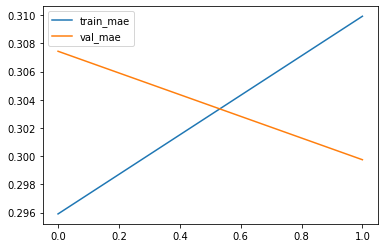

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label = 'train_mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.legend()

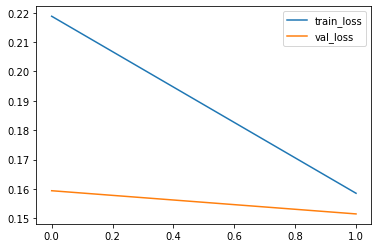

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

In [ ]:
val_x = np.expand_dims(x_val[0], axis = 0)

In [ ]:
val_x.shape

(1, 75, 75, 3)

In [ ]:
x_val[0].shape

(75, 75, 3)

In [ ]:
result = cnn_model.predict(val_x)

1/1 [==============================] - 0s 148ms/step


In [ ]:
print(result)

[[0.14363179 0.822696   0.93416965 0.0069321  0.3507987  0.5323654 ]]


In [ ]:
print(y_val[0])

[0 1 1 1 0 0]


### 여기서부터 fine tuning

### Model3. EfficientNet을 이용한 Fine-tuning

EfficientNet과 호환하기 위해 이미지를 224*224로 전처리한 새로운 numpy 배열을 따로 저장

In [ ]:
from tensorflow.keras import applications
import tensorflow as tf

base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, weights = 'imagenet')

base_model.trainable = False

base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [ ]:
base_model.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
base_model.output

<KerasTensor: shape=(None, None, None, 1280) dtype=float32 (created by layer 'top_activation')>

In [ ]:
# pretrained model의 category와 유사하지 않다고 생각하여 전체 레이어를 동결 후 학습

# top <- false 이기 때문에 concatenate까지 하고 모델은 종료
# flatten 대신 GlobalAveragePooling2D()

from tensorflow.keras import layers

flat_layer = layers.GlobalAveragePooling2D()(base_model.output)

output = layers.Dense(6, activation = 'sigmoid')(flat_layer)

import tensorflow as tf
model = tf.keras.models.Model(base_model.input, output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                            

In [ ]:
custom_adam = tf.keras.optimizers.Adam(learning_rate=0.001)

#fine tuning fit 

model.compile(optimizer=custom_adam, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 30, batch_size = 1)

Epoch 1/30
12000/12000 [==============================] - 185s 14ms/step - loss: 0.1325 - mae: 0.2426 - val_loss: 0.1344 - val_mae: 0.2364
Epoch 2/30
12000/12000 [==============================] - 177s 15ms/step - loss: 0.1250 - mae: 0.2207 - val_loss: 0.1303 - val_mae: 0.2319
Epoch 3/30
12000/12000 [==============================] - 180s 15ms/step - loss: 0.1219 - mae: 0.2129 - val_loss: 0.1289 - val_mae: 0.2260
Epoch 4/30
12000/12000 [==============================] - 161s 13ms/step - loss: 0.1205 - mae: 0.2099 - val_loss: 0.1320 - val_mae: 0.2368
Epoch 5/30
12000/12000 [==============================] - 161s 13ms/step - loss: 0.1187 - mae: 0.2060 - val_loss: 0.1329 - val_mae: 0.2069
Epoch 6/30
12000/12000 [==============================] - 175s 15ms/step - loss: 0.1176 - mae: 0.2038 - val_loss: 0.1300 - val_mae: 0.2117
Epoch 7/30
12000/12000 [==============================] - 163s 14ms/step - loss: 0.1166 - mae: 0.2011 - val_loss: 0.1274 - val_mae: 0.2067
Epoch 8/30
12000/12000 [===

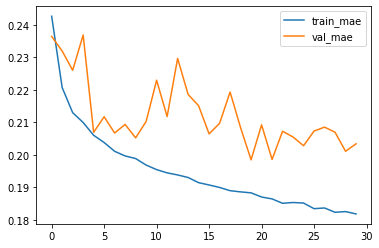

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label = 'train_mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.legend()

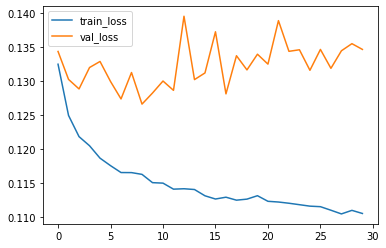

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

In [ ]:
val_x = np.expand_dims(x_val[0], axis = 0)

In [ ]:
val_x.shape

(1, 224, 224, 3)

In [ ]:
result = model.predict(val_x)

1/1 [==============================] - 1s 1s/step


In [ ]:
 np.set_printoptions(precision=6, suppress=True)

In [ ]:
print(result)

[[0.023698 0.969523 0.057289 0.000012 0.914596 0.047314]]


In [ ]:
result = result * 100

In [ ]:
print(result)

[[ 2.369752 96.952289  5.728927  0.001197 91.459632  4.731373]]


In [ ]:
print(y_val[0])

[0 1 0 0 0 0]


2.369752 96.952289  5.728927  0.001197 91.459632  4.731373 

-> 2% 96% 6% 0% 91% 5% vs [0 1 0 0 0 0] 

모낭사이홍반/농포에 대한 예측 적중률이 낮음

내일 learnign rate와 batch size를 수정해서 한번 더 학습 및 예측해보기로